In [59]:
import codeUtils as utils

In [60]:
titanic_test, titanic_train = utils.load_data()

In [61]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 1: Handling data before applying DataMining Features

#### 1.1 Drop Columns with no relevant information

we dropped the following:

- PassengerId : useless numbering of passengers
- Name : String value that has no effect
- Ticket : String value that has no effect
- Cabin : String value that has no effect


In [62]:
utils.drop_unnecessary_columns(titanic_train)
utils.drop_unnecessary_columns(titanic_test)

#### 1.2 Dropping rows with NaN values

the reason: Features in this DataBase are too important to auto-fill


In [63]:
utils.drop_na_rows(titanic_train)
utils.drop_na_rows(titanic_test)

In [64]:
titanic_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


#### 1.3 Binning Sex attribute

- male : {0}
- female : {1}


In [65]:
utils.bin_sex_attributes(titanic_train)
utils.bin_sex_attributes(titanic_test)
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,Q
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
889,1,1,0,26.0,0,0,30.0000,C


#### 1.4 converting the categorical feature 'Embarked' into numerical labels


In [66]:
utils.convert_embarked_into_numbers(titanic_train)
utils.convert_embarked_into_numbers(titanic_test)

In [67]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,1
886,0,2,0,27.0,0,0,13.0000,2
887,1,1,1,19.0,0,0,30.0000,2
889,1,1,0,26.0,0,0,30.0000,0


#### 1.5 Testing accuaracy with diffrent classifiers Before preprocessing

In [68]:
x_train, y_train, x_test, y_test = utils.get_data_for_classification(titanic_train, titanic_test)

### SVC

In [69]:
utils.test_accuracy_svc(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       204
           1       0.56      0.33      0.42       127

    accuracy                           0.64       331
   macro avg       0.61      0.58      0.58       331
weighted avg       0.63      0.64      0.62       331

The accuracy of the classifier is: 0.6435045317220544


### RandomForest

In [70]:
utils.test_accuracy_random_forrest(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       204
           1       0.75      0.79      0.77       127

    accuracy                           0.82       331
   macro avg       0.81      0.81      0.81       331
weighted avg       0.82      0.82      0.82       331

The accuracy of the classifier is: 0.8187311178247734


### LogisticRegression

In [71]:
utils.test_accuracy_logistic_regression(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       204
           1       0.87      0.91      0.89       127

    accuracy                           0.91       331
   macro avg       0.90      0.91      0.91       331
weighted avg       0.91      0.91      0.91       331

The accuracy of the classifier is: 0.9123867069486404


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 2: Pre-Processing


Creating datasets for min-max and standarization scalers

In [72]:
titanic_test_minMax = utils.copy_data(titanic_test)
titanic_test_standarization = utils.copy_data(titanic_test)
titanic_train_minMax = utils.copy_data(titanic_train)
titanic_train_standarization = utils.copy_data(titanic_train)

#### 2.1: Normalization

using MinMaxScaler function


In [73]:
numerical_cols = titanic_train_minMax.columns.drop('Survived')

utils.preprocess_numerical_columns(titanic_train_minMax, numerical_cols)
utils.preprocess_numerical_columns(titanic_test_minMax, numerical_cols)

utils.normalize(titanic_train_minMax, numerical_cols)
utils.normalize(titanic_test_minMax, numerical_cols)

titanic_train_minMax

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,0.0,0.271174,0.2,0.000000,0.014151,1.0
1,1,0.0,1.0,0.472229,0.2,0.000000,0.139136,0.0
2,1,1.0,1.0,0.321438,0.0,0.000000,0.015469,1.0
3,1,0.0,1.0,0.434531,0.2,0.000000,0.103644,1.0
4,0,1.0,0.0,0.434531,0.0,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...,...
885,0,1.0,1.0,0.484795,0.0,0.833333,0.056848,0.5
886,0,0.5,0.0,0.334004,0.0,0.000000,0.025374,1.0
887,1,0.0,1.0,0.233476,0.0,0.000000,0.058556,1.0
889,1,0.0,0.0,0.321438,0.0,0.000000,0.058556,0.0


In [74]:
titanic_test_minMax

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,0.0,0.452723,0.000,0.000000,0.015282,0.5,0
1,1.0,1.0,0.617566,0.125,0.000000,0.013663,1.0,1
2,0.5,0.0,0.815377,0.000,0.000000,0.018909,0.5,0
3,1.0,0.0,0.353818,0.000,0.000000,0.016908,1.0,0
4,1.0,1.0,0.287881,0.125,0.166667,0.023984,1.0,1
...,...,...,...,...,...,...,...,...
409,1.0,1.0,0.037320,0.125,0.166667,0.026887,1.0,1
411,0.0,1.0,0.485692,0.125,0.000000,0.175668,0.5,1
412,1.0,1.0,0.367005,0.000,0.000000,0.015176,1.0,1
414,0.0,1.0,0.512066,0.000,0.000000,0.212559,0.0,1


#### 2.2 Standarization

using StandardScaler function


In [75]:
numerical_cols = titanic_train_standarization.columns.drop('Survived')

utils.preprocess_numerical_columns(titanic_train_minMax, numerical_cols)
utils.preprocess_numerical_columns(titanic_test_minMax, numerical_cols)

utils.standardize(titanic_train_standarization, numerical_cols)
utils.standardize(titanic_test_standarization, numerical_cols)

titanic_train_standarization

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.908600,-0.756138,-0.527669,0.522511,-0.506787,-0.516380,0.519588
1,1,-1.482983,1.322511,0.577094,0.522511,-0.506787,0.694046,-2.049487
2,1,0.908600,1.322511,-0.251478,-0.552714,-0.506787,-0.503620,0.519588
3,1,-1.482983,1.322511,0.369951,0.522511,-0.506787,0.350326,0.519588
4,0,0.908600,-0.756138,0.369951,-0.552714,-0.506787,-0.501257,0.519588
...,...,...,...,...,...,...,...,...
885,0,0.908600,1.322511,0.646142,-0.552714,5.350885,-0.102875,-0.764949
886,0,-0.287191,-0.756138,-0.182430,-0.552714,-0.506787,-0.407687,0.519588
887,1,-1.482983,1.322511,-0.734812,-0.552714,-0.506787,-0.086335,0.519588
889,1,-1.482983,-0.756138,-0.251478,-0.552714,-0.506787,-0.086335,-2.049487


In [76]:
titanic_test_standarization

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.015426,-0.789018,0.306657,-0.553272,-0.492120,-0.542281,-0.508681,0
1,1.015426,1.267399,1.194236,0.591310,-0.492120,-0.555844,0.652515,1
2,-0.168046,-0.789018,2.259331,-0.553272,-0.492120,-0.511885,-0.508681,0
3,1.015426,-0.789018,-0.225890,-0.553272,-0.492120,-0.528651,0.652515,0
4,1.015426,1.267399,-0.580922,0.591310,0.741907,-0.469357,0.652515,1
...,...,...,...,...,...,...,...,...
409,1.015426,1.267399,-1.930042,0.591310,0.741907,-0.445026,0.652515,1
411,-1.351518,1.267399,0.484173,0.591310,-0.492120,0.801785,-0.508681,1
412,1.015426,1.267399,-0.154884,-0.553272,-0.492120,-0.543168,0.652515,1
414,-1.351518,1.267399,0.626186,-0.553272,-0.492120,1.110932,-1.669877,1


### Step 3: Selection Features - Recursive feature selection


#### 3.1: LogisticRegression


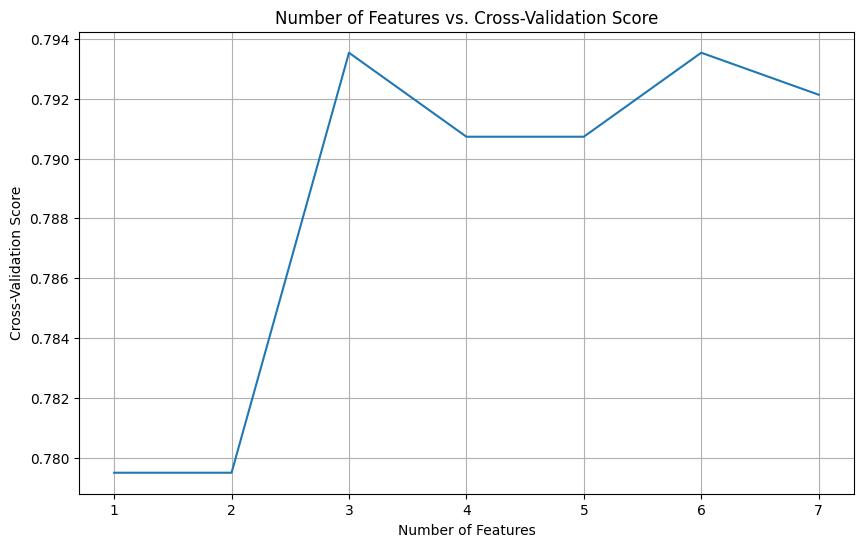

Optimal number of features: 3
Selected features: Index(['Pclass', 'Sex', 'Age'], dtype='object')


Index(['Pclass', 'Sex', 'Age'], dtype='object')

In [77]:
utils.features_selection_logistic_regression(titanic_train_minMax)

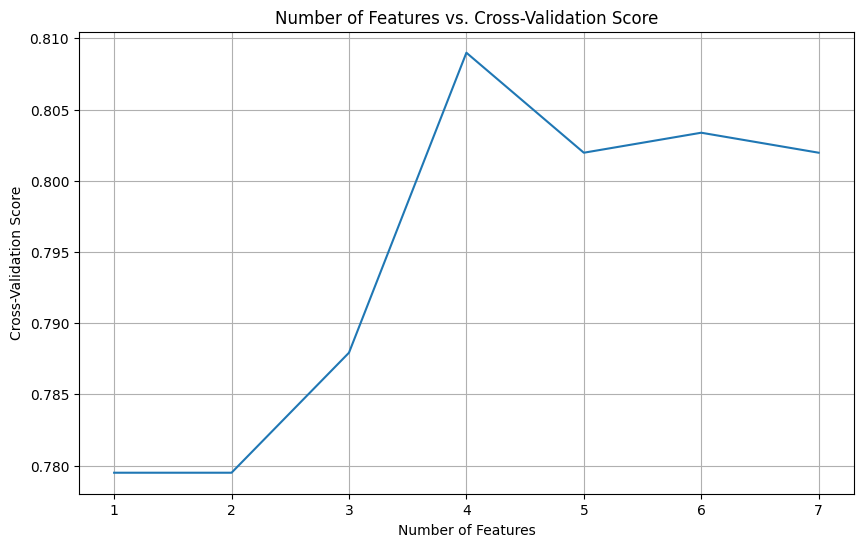

Optimal number of features: 4
Selected features: Index(['Pclass', 'Sex', 'Age', 'SibSp'], dtype='object')


In [78]:
selected_features_regression = utils.features_selection_logistic_regression(titanic_train_standarization)

#### 3.2 Random Forest Classifier


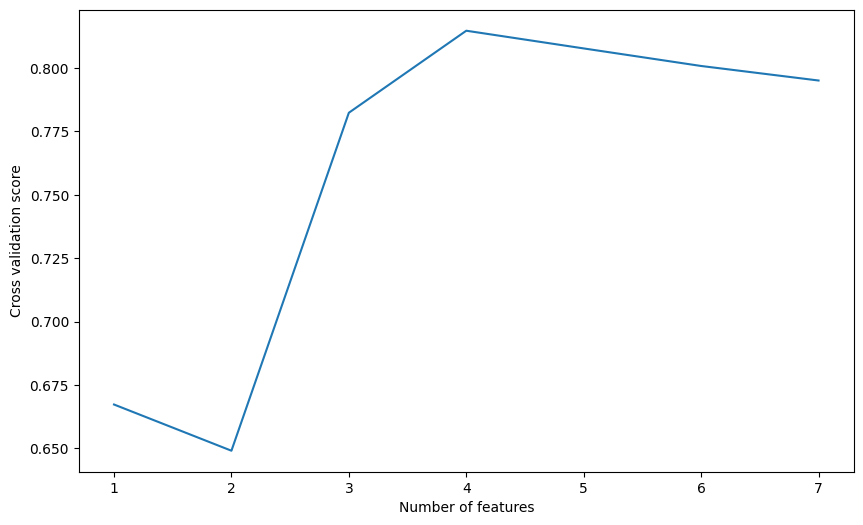

Optimal number of features: 4
Selected features: Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')


In [79]:
selected_features_random_forrest = utils.features_selection_random_forrest(titanic_train_minMax)

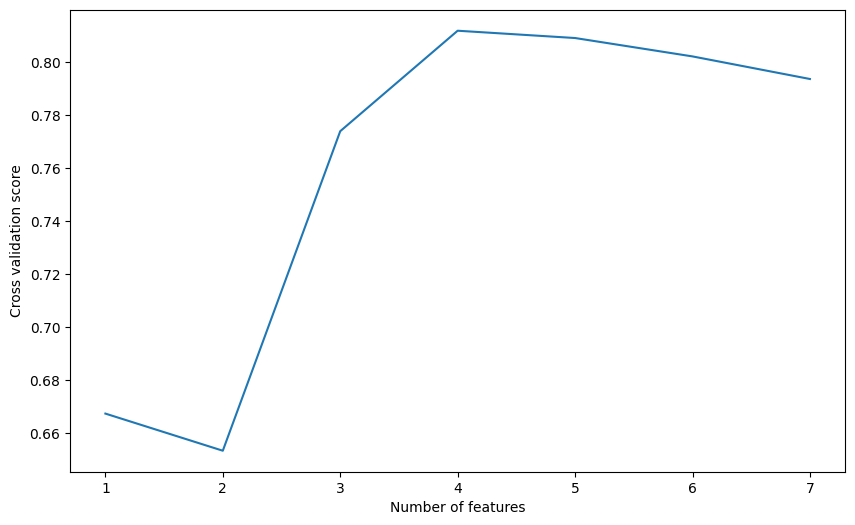

Optimal number of features: 4
Selected features: Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')


In [80]:
selected_features_random_forrest = utils.features_selection_random_forrest(titanic_train_standarization)

### Step 4: Featurtes Extraction
We stayed at standarization because it was giving us better results

In [81]:
titanic_train = utils.extract_features(titanic_train_standarization, selected_features_regression)
titanic_train

,Pclass,Sex,Age,SibSp,Survived
0,0.908600,-0.756138,-0.527669,0.522511,0
1,-1.482983,1.322511,0.577094,0.522511,1
2,0.908600,1.322511,-0.251478,-0.552714,1
3,-1.482983,1.322511,0.369951,0.522511,1
4,0.908600,-0.756138,0.369951,-0.552714,0
...,...,...,...,...,...
885,0.908600,1.322511,0.646142,-0.552714,0
886,-0.287191,-0.756138,-0.182430,-0.552714,0
887,-1.482983,1.322511,-0.734812,-0.552714,1
889,-1.482983,-0.756138,-0.251478,-0.552714,1


In [82]:
titanic_test = utils.extract_features(titanic_test_standarization, selected_features_regression)
titanic_test

,Pclass,Sex,Age,SibSp,Survived
0,1.015426,-0.789018,0.306657,-0.553272,0
1,1.015426,1.267399,1.194236,0.591310,1
2,-0.168046,-0.789018,2.259331,-0.553272,0
3,1.015426,-0.789018,-0.225890,-0.553272,0
4,1.015426,1.267399,-0.580922,0.591310,1
...,...,...,...,...,...
409,1.015426,1.267399,-1.930042,0.591310,1
411,-1.351518,1.267399,0.484173,0.591310,1
412,1.015426,1.267399,-0.154884,-0.553272,1
414,-1.351518,1.267399,0.626186,-0.553272,1


In [83]:
X_test_pca, X_train_pca = utils.pca_transform(titanic_train, titanic_test)

### Step 5: Testing accuaracy with diffrent classifiers


### Load data for classification

In [84]:
x_train, y_train, x_test, y_test = utils.get_data_for_classification(titanic_train, titanic_test)

##### SVC

In [85]:
utils.test_accuracy_svc(X_train_pca, y_train, X_test_pca, y_test)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       204
           1       0.94      0.82      0.87       127

    accuracy                           0.91       331
   macro avg       0.92      0.89      0.90       331
weighted avg       0.91      0.91      0.91       331

The accuracy of the classifier is: 0.9093655589123867


#### RandomForest

In [86]:
utils.test_accuracy_random_forrest(X_train_pca, y_train, X_test_pca, y_test)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       204
           1       0.86      0.74      0.80       127

    accuracy                           0.85       331
   macro avg       0.86      0.83      0.84       331
weighted avg       0.86      0.85      0.85       331

The accuracy of the classifier is: 0.8549848942598187


#### LogisticRegression

In [87]:
utils.test_accuracy_logistic_regression(X_train_pca, y_train, X_test_pca, y_test)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       204
           1       0.89      0.87      0.88       127

    accuracy                           0.91       331
   macro avg       0.91      0.90      0.90       331
weighted avg       0.91      0.91      0.91       331

The accuracy of the classifier is: 0.9093655589123867
